# Module 4: Orchestration — Putting It All Together

**Duration:** ~15 minutes  
**Goal:** Combine all patterns into a complete portfolio assistant

---

## The Real World

You've learned three patterns:
- **Tool calling** for fetching real data
- **ReAct** for multi-step reasoning
- **CodeAct** for custom calculations

In isolation, each is useful. But real tasks need **all three**.

```
"Analyze my portfolio:
 - 100 shares of AAPL
 - 50 shares of NVDA
 - 200 shares of MSFT

 Calculate total value, individual weights,
 and the portfolio's overall risk metrics."
```

This task needs:
- **Tool calling** to get current prices
- **ReAct** to gather data for each stock systematically
- **CodeAct** to calculate weights, Sharpe ratio, and risk metrics

That's **orchestration**: combining patterns to solve complex problems.

---

## Setup

In [14]:
# Install smolagents if needed
!pip install smolagents -q

In [15]:
from smolagents import CodeAgent, tool
from smolagents import OpenAIServerModel
from smolagents.monitoring import LogLevel
import getpass

In [16]:
# Enter your API key
API_KEY = getpass.getpass("Enter your OpenAI API key: ")
model = OpenAIServerModel("o3-mini", api_key=API_KEY)
print("Model ready!")

Enter your OpenAI API key: ··········
Model ready!


---

## Building the Portfolio Assistant

First, let's set up all our tools.

In [17]:
# Tool 1: Get current stock price
@tool
def get_stock_price(ticker: str) -> float:
    """Get the current price for a stock ticker.

    Args:
        ticker: The stock symbol (AAPL, NVDA, MSFT, GOOGL, AMZN, META)

    Returns:
        The current stock price as a float
    """
    prices = {
        "AAPL": 178.50, "NVDA": 875.30, "MSFT": 378.90,
        "GOOGL": 141.25, "AMZN": 178.75, "META": 505.50
    }
    return prices.get(ticker.upper(), 0.0)

# Tool 2: Get historical returns (for risk calculations)
@tool
def get_historical_returns(ticker: str) -> list:
    """Get the last 12 months of historical returns for a stock.

    Args:
        ticker: The stock symbol (AAPL, NVDA, MSFT, GOOGL, AMZN, META)

    Returns:
        List of monthly returns as decimals (e.g., 0.05 = 5%)
    """
    returns = {
        "AAPL": [0.02, 0.05, -0.03, 0.04, 0.01, 0.03, -0.02, 0.06, 0.02, -0.01, 0.04, 0.03],
        "NVDA": [0.08, 0.12, -0.05, 0.15, -0.03, 0.10, 0.07, -0.02, 0.09, 0.04, 0.11, 0.06],
        "MSFT": [0.03, 0.02, 0.01, 0.04, -0.01, 0.02, 0.03, 0.01, 0.02, 0.03, 0.01, 0.02],
        "GOOGL": [0.04, 0.03, -0.02, 0.05, 0.02, 0.01, 0.04, -0.01, 0.03, 0.02, 0.03, 0.02],
        "AMZN": [0.05, 0.04, -0.03, 0.06, 0.01, 0.02, 0.05, -0.02, 0.04, 0.03, 0.04, 0.02],
        "META": [0.06, 0.08, -0.04, 0.07, 0.02, 0.05, 0.04, -0.01, 0.05, 0.03, 0.06, 0.04]
    }
    return returns.get(ticker.upper(), [])

# Tool 3: Get company sector
@tool
def get_company_sector(ticker: str) -> str:
    """Get the sector classification for a company.

    Args:
        ticker: The stock symbol

    Returns:
        The company's sector and sub-sector classification
    """
    sectors = {
        "AAPL": "Technology - Consumer Electronics",
        "NVDA": "Technology - Semiconductors",
        "MSFT": "Technology - Software",
        "GOOGL": "Technology - Internet Services",
        "AMZN": "Consumer Cyclical - E-commerce",
        "META": "Technology - Social Media"
    }
    return sectors.get(ticker.upper(), "Unknown")

print("Three tools ready:")
print("- get_stock_price")
print("- get_historical_returns")
print("- get_company_sector")

Three tools ready:
- get_stock_price
- get_historical_returns
- get_company_sector


---

## The Orchestrated Agent

Now we create the agent with all tools AND CodeAct capability.

In [18]:
# Create the portfolio assistant
portfolio_assistant = CodeAgent(
    tools=[get_stock_price, get_historical_returns, get_company_sector],
    model=model,
    verbosity_level=LogLevel.INFO,
    max_steps=15,  # Allow more steps for complex analysis
    additional_authorized_imports=["numpy", "pandas"]
)

print("Portfolio assistant ready!")
print("This agent can call tools AND write code.")
print("It will choose the right approach for each sub-task.")

Portfolio assistant ready!
This agent can call tools AND write code.
It will choose the right approach for each sub-task.


---

## The Full Analysis

Let's run the complete portfolio analysis. Watch how the agent:
1. Uses **tool calling** to gather data
2. Uses **ReAct** to reason through what it needs
3. Uses **CodeAct** to calculate everything

In [19]:
result = portfolio_assistant.run("""
Analyze this portfolio:
- 100 shares of AAPL
- 50 shares of NVDA
- 200 shares of MSFT

Please provide:
1. Current value of each position
2. Total portfolio value
3. Weight of each position (as percentage)
4. Sector concentration analysis
5. Portfolio Sharpe ratio (assume 0.3% monthly risk-free rate)
6. Which position contributes most to portfolio risk?

Format the output as a clear report.
""", reset=False)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Analyze this portfolio:                                                                                         │
│ - 100 shares of AAPL                                                                                            │
│ - 50 shares of NVDA                                                                                             │
│ - 200 shares of MSFT                                                                                            │
│                                                                                                                 │
│ Please provide:                                                                                                 │
│ 1. Current value of each position                                                                               │
│ 2. Total portfolio value                                                                                        │
│ 3. Weight of each position (as percentage)                                                                      │
│ 4. Sector concentration analysis                                                                                │
│ 5. Portfolio Sharpe ratio (assume 0.3% monthly risk-free rate)                                                  │
│ 6. Which position contributes most to portfolio risk?                                                           │
│                                                                                                                 │
│ Format the output as a clear report.                                                                            │
│                                                                                                                 │
╰─ OpenAIModel - o3-mini ─────────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import numpy as np                                                                                               
                                                                                                                   
  # Portfolio positions                                                                                            
  shares = {"AAPL": 100, "NVDA": 50, "MSFT": 200}                                                                  
  tickers = list(shares.keys())                                                                                    
                                                                                                                   
  # 1. CURRENT VALUE OF EACH POSITION                                                                              
  prices = {}                                                                                                      
  position_values = {}                                                                                             
  for ticker in tickers:                                                                                           
      # Get current stock price with the provided tool                                                             
      prices[ticker] = get_stock_price(ticker=ticker)                                                              
      position_values[ticker] = prices[ticker] * shares[ticker]                                                    
                                                                                                                   
  # 2. TOTAL PORTFOLIO VALUE                                                                                       
  total_value = sum(position_values.values())                                                                      
                                                                                                                   
  # 3. WEIGHT OF EACH POSITION (as percentage)                                                                     
  weights = {}                                                                                                     
  for ticker in tickers:                                                                                           
      weights[ticker] = position_values[ticker] / total_value                                                      
                                                                                                                   
  # 4. SECTOR CONCENTRATION ANALYSIS - get each company sector.                                                    
  sectors = {}                                                                                                     
  for ticker in tickers:                                                                                           
      sectors[ticker] = get_company_sector(ticker=ticker)                                                          
                                                                                                                   
  # 5. PORTFOLIO SHARPE RATIO                                                                                      
  # get historical returns arrays (assume these are 12 monthly returns for each stock)                             
  hist_returns = {}                                                                                                
  for ticker in tickers:                                                                                           
      hist_returns[ticker] = get_historical_returns(ticker=ticker)                                                 
                                                                                                                   
  # Convert historical returns into a matrix, assuming ea

Final answer: Portfolio Analysis Report
=========================

1. Current Value of Each Position:
   - AAPL: 100 shares x $178.50 = $17,850.00
   - NVDA: 50 shares x $875.30 = $43,765.00
   - MSFT: 200 shares x $378.90 = $75,780.00

2. Total Portfolio Value: $137,395.00

3. Weight of Each Position:
   - AAPL: 12.99%
   - NVDA: 31.85%
   - MSFT: 55.15%

4. Sector Concentration Analysis:
   - AAPL: Sector = Technology - Consumer Electronics
   - NVDA: Sector = Technology - Semiconductors
   - MSFT: Sector = Technology - Software

5. Portfolio Sharpe Ratio:
   - Mean Monthly Return: 3.23%
   - Monthly Volatility: 2.70%
   - Sharpe Ratio: 1.09

6. Position Contributing Most to Portfolio Risk:
   - NVDA has the highest risk contribution.

[Step 1: Duration 20.39 seconds| Input tokens: 2,218 | Output tokens: 2,431]

In [20]:
# Inspect what the agent remembers
print("Agent Memory:")
print("=" * 50)

for i, step in enumerate(portfolio_assistant.memory.steps):
    step_type = type(step).__name__
    print(f"\nStep {i+1}: {step_type}")

    # TaskStep contains the original query
    if step_type == "TaskStep":
        if hasattr(step, 'task'):
            print(f"   Task: {step.task}")

    # ActionStep contains tool calls and results
    elif step_type == "ActionStep":
        if hasattr(step, 'tool_calls') and step.tool_calls:
            for tc in step.tool_calls:
                tool_name = getattr(tc, 'name', 'unknown')
                tool_args = getattr(tc, 'arguments', {})
                print(f"   Tool: {tool_name}({tool_args})")
        if hasattr(step, 'observations') and step.observations:
            obs = str(step.observations)[:60] + "..." if len(str(step.observations)) > 60 else step.observations
            print(f"   Result: {obs}")

Agent Memory:

Step 1: TaskStep
   Task: 
Analyze this portfolio:
- 100 shares of AAPL
- 50 shares of NVDA
- 200 shares of MSFT

Please provide:
1. Current value of each position
2. Total portfolio value
3. Weight of each position (as percentage)
4. Sector concentration analysis
5. Portfolio Sharpe ratio (assume 0.3% monthly risk-free rate)
6. Which position contributes most to portfolio risk?

Format the output as a clear report.


Step 2: ActionStep
   Tool: python_interpreter(import numpy as np

# Portfolio positions
shares = {"AAPL": 100, "NVDA": 50, "MSFT": 200}
tickers = list(shares.keys())

# 1. CURRENT VALUE OF EACH POSITION
prices = {}
position_values = {}
for ticker in tickers:
    # Get current stock price with the provided tool
    prices[ticker] = get_stock_price(ticker=ticker)
    position_values[ticker] = prices[ticker] * shares[ticker]

# 2. TOTAL PORTFOLIO VALUE
total_value = sum(position_values.values())

# 3. WEIGHT OF EACH POSITION (as percentage)
weights = {}
for t

---

## The Orchestration Pattern

Let's break down what the agent did:

```
┌─────────────────────────────────────────────────────────────┐
│                    ORCHESTRATION FLOW                        │
│                                                              │
│  Step 1: TOOL CALLING                                        │
│  ├─ get_stock_price (AAPL, NVDA, MSFT)                      │
│  ├─ get_company_sector (AAPL, NVDA, MSFT)                   │
│  └─ get_historical_returns (AAPL, NVDA, MSFT)               │
│                          │                                   │
│                          ▼                                   │
│  Step 2: REASONING (ReAct)                                   │
│  ├─ "I have all the data"                                   │
│  └─ "Now I'll calculate the metrics"                        │
│                          │                                   │
│                          ▼                                   │
│  Step 3: CODE GENERATION (CodeAct)                           │
│  ├─ Calculate position values                               │
│  ├─ Calculate weights                                       │
│  ├─ Calculate portfolio returns                             │
│  ├─ Calculate Sharpe ratio                                  │
│  └─ Generate formatted report                               │
│                          │                                   │
│                          ▼                                   │
│  Step 4: FINAL ANSWER                                        │
│  └─ Synthesized report with insights                        │
└─────────────────────────────────────────────────────────────┘
```

**Tool calling** for data gathering. **ReAct** for deciding what to do next. **CodeAct** for computation. All orchestrated automatically.

---

## What-If Analysis

The real power is that you can ask follow-up questions.

In [21]:
# Follow-up question: What-if scenario
result = portfolio_assistant.run("""
Assume the prior portfolio. What if I sold 25 shares of NVDA and bought more MSFT with the proceeds?
How would that change the portfolio weights and risk profile?

Show the before and after comparison.
""", reset=False)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Assume the prior portfolio. What if I sold 25 shares of NVDA and bought more MSFT with the proceeds?            │
│ How would that change the portfolio weights and risk profile?                                                   │
│                                                                                                                 │
│ Show the before and after comparison.                                                                           │
│                                                                                                                 │
╰─ OpenAIModel - o3-mini ─────────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import numpy as np                                                                                               
                                                                                                                   
  # Assume previous values from the prior computation:                                                             
  # Prices from previous execution:                                                                                
  price_AAPL = 178.50                                                                                              
  price_NVDA = 875.30                                                                                              
  price_MSFT = 378.90                                                                                              
                                                                                                                   
  # Original portfolio positions:                                                                                  
  orig_shares = {"AAPL": 100, "NVDA": 50, "MSFT": 200}                                                             
  orig_position_values = {                                                                                         
      "AAPL": orig_shares["AAPL"] * price_AAPL,                                                                    
      "NVDA": orig_shares["NVDA"] * price_NVDA,                                                                    
      "MSFT": orig_shares["MSFT"] * price_MSFT                                                                     
  }                                                                                                                
  orig_total = sum(orig_position_values.values())                                                                  
  orig_weights = {ticker: orig_position_values[ticker]/orig_total for ticker in orig_shares}                       
                                                                                                                   
  # Assume these were computed earlier from historical data:                                                       
  # hist_returns is a dictionary with 12 monthly returns for each ticker.                                          
  # The order of tickers is: AAPL, NVDA, MSFT.                                                                     
  # Also, cov_matrix (3x3 numpy array) and mean_returns (numpy array) are computed.                                
  # We use the existing variables: hist_returns, cov_matrix, mean_returns                                          
                                                                                                                   
  # Compute original portfolio metrics:                                                                            
  w_orig = np.array([orig_weights[ticker] for ticker in ["AAPL", "NVDA", "MSFT"]])                                 
  portfolio_mean_orig = np.dot(w_orig, mean_returns)                                                               
  port_var_orig = np.dot(w_orig, np.dot(cov_matrix, w_orig))                                                       
  portfolio_vol_orig = np.sqrt(port_var_orig)                                                                      
  risk_free_rate = 0.003  # 0.3% monthly                                                                           
  portfolio_sharpe_orig = (portfolio_mean_orig - risk_free_rate) / portfolio_vol_orig if portfolio_vol_orig != 0   
  else np.nan                                                                                                      
  marginal_contrib_orig = np.dot(cov_matrix, w_orig)                                                               
  risk_contrib_orig = w_orig * marginal_contrib_orig     

Final answer: Portfolio Comparison Report
=============================

Before Rebalancing:
-------------------
Positions:
  - AAPL: 100 shares, Value = $17,850.00, Weight = 12.99%
  - NVDA: 50 shares, Value = $43,765.00, Weight = 31.85%
  - MSFT: 200 shares, Value = $75,780.00, Weight = 55.15%

Total Portfolio Value: $137,395.00
Portfolio Mean Monthly Return: 3.23%
Portfolio Monthly Volatility: 2.70%
Portfolio Sharpe Ratio: 1.09
Highest Risk Contribution: NVDA

After Rebalancing (Sell 25 NVDA, Buy more MSFT):
----------------------------------------------
Positions:
  - AAPL: 100.00 shares, Value = $17,850.00, Weight = 12.99%
  - NVDA: 25.00 shares, Value = $21,882.50, Weight = 15.93%
  - MSFT: 257.75 shares, Value = $97,662.50, Weight = 71.08%

Total Portfolio Value: $137,395.00
Portfolio Mean Monthly Return: 2.58%
Portfolio Monthly Volatility: 1.89%
Portfolio Sharpe Ratio: 1.21
Highest Risk Contribution: NVDA

[Step 2: Duration 27.48 seconds| Input tokens: 6,898 | Output tokens: 6,347]

The agent understands context. It takes the new scenario and recalculates everything.

**But wait — how did it know the original portfolio?**

The agent has **memory**. It remembered the context from the previous query. That's a crucial capability we need to understand.

---

## Agent Memory: The Hidden Pattern

Every query we've run leaves a trace. The agent maintains a **memory** of:
- What we asked
- What tools it called
- What results it got
- What it concluded

This is why the "what-if" question worked — the agent remembered the original portfolio.

```
┌─────────────────────────────────────────────────────────────┐
│                    AGENT MEMORY                              │
│                                                              │
│  Query 1: "Analyze portfolio: AAPL, NVDA, MSFT"             │
│  ├─ Tool calls: get_stock_price (x3)                        │
│  ├─ Tool calls: get_historical_returns (x3)                 │
│  ├─ Code execution: Calculate weights, Sharpe               │
│  └─ Result: Portfolio analysis report                       │
│                          │                                   │
│                          ▼ (memory persists)                 │
│                          │                                   │
│  Query 2: "What if I sold 25 NVDA shares?"                  │
│  ├─ Recalls: Original portfolio context                     │
│  ├─ Tool calls: Get updated prices                          │
│  ├─ Code execution: Recalculate with changes                │
│  └─ Result: Before/after comparison                         │
└─────────────────────────────────────────────────────────────┘
```

**This is conversational context.** The agent isn't starting fresh each time.

In [22]:
# Inspect what the agent remembers
print("Agent Memory:")
print("=" * 50)

for i, step in enumerate(portfolio_assistant.memory.steps):
    step_type = type(step).__name__
    print(f"\nStep {i+1}: {step_type}")

    # TaskStep contains the original query
    if step_type == "TaskStep":
        if hasattr(step, 'task'):
            print(f"   Task: {step.task}")

    # ActionStep contains tool calls and results
    elif step_type == "ActionStep":
        if hasattr(step, 'tool_calls') and step.tool_calls:
            for tc in step.tool_calls:
                tool_name = getattr(tc, 'name', 'unknown')
                tool_args = getattr(tc, 'arguments', {})
                print(f"   Tool: {tool_name}({tool_args})")
        if hasattr(step, 'observations') and step.observations:
            obs = str(step.observations)[:60] + "..." if len(str(step.observations)) > 60 else step.observations
            print(f"   Result: {obs}")

Agent Memory:

Step 1: TaskStep
   Task: 
Analyze this portfolio:
- 100 shares of AAPL
- 50 shares of NVDA
- 200 shares of MSFT

Please provide:
1. Current value of each position
2. Total portfolio value
3. Weight of each position (as percentage)
4. Sector concentration analysis
5. Portfolio Sharpe ratio (assume 0.3% monthly risk-free rate)
6. Which position contributes most to portfolio risk?

Format the output as a clear report.


Step 2: ActionStep
   Tool: python_interpreter(import numpy as np

# Portfolio positions
shares = {"AAPL": 100, "NVDA": 50, "MSFT": 200}
tickers = list(shares.keys())

# 1. CURRENT VALUE OF EACH POSITION
prices = {}
position_values = {}
for ticker in tickers:
    # Get current stock price with the provided tool
    prices[ticker] = get_stock_price(ticker=ticker)
    position_values[ticker] = prices[ticker] * shares[ticker]

# 2. TOTAL PORTFOLIO VALUE
total_value = sum(position_values.values())

# 3. WEIGHT OF EACH POSITION (as percentage)
weights = {}
for t

### What Memory Enables

| Capability | Example |
|------------|---------|
| **Follow-up questions** | "What about adding GOOGL?" |
| **Comparisons** | "Is that better than before?" |
| **Refinements** | "Show that as a pie chart" |
| **Corrections** | "Actually, I have 150 shares of AAPL" |

Memory turns a one-shot tool into a **conversation**.

In [23]:
# Demonstrate conversational memory with another follow-up
result = portfolio_assistant.run("""
Based on the analysis so far, which single position contributes
most to the portfolio's volatility? Should I reduce it?
""", reset=False)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Based on the analysis so far, which single position contributes                                                 │
│ most to the portfolio's volatility? Should I reduce it?                                                         │
│                                                                                                                 │
╰─ OpenAIModel - o3-mini ─────────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("NVDA is the single position contributing most to the portfolio's volatility. Given its high risk   
  contribution, reducing NVDA exposure could be a good way to lower the overall portfolio volatility, if that      
  aligns with your risk tolerance and investment objectives.")                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: NVDA is the single position contributing most to the portfolio's volatility. Given its high risk 
contribution, reducing NVDA exposure could be a good way to lower the overall portfolio volatility, if that aligns 
with your risk tolerance and investment objectives.

[Step 3: Duration 4.80 seconds| Input tokens: 15,129 | Output tokens: 6,751]

**Notice:** We didn't repeat the portfolio details. The agent already knew them from memory.

### Memory Limits

Memory isn't infinite. Key considerations:

1. **Context window** — LLMs have token limits (~128K for GPT-4o)
2. **Within-session only** — Memory clears when you create a new agent
3. **No persistent storage** — By default, if you restart, you start fresh

For production systems, you'd add:
- **Conversation persistence** (save to database)
- **Memory summarization** (compress old context)
- **User profiles** (remember preferences across sessions)

*We cover these production patterns in the full course.*

---

## Your Portfolio Assistant

You've just built a portfolio assistant that can:

```
✅ Fetch real-time prices
✅ Analyze sector concentration
✅ Calculate risk metrics (Sharpe, volatility)
✅ Identify risk contributors
✅ Run what-if scenarios
✅ Generate formatted reports
```

And you did it with about **50 lines of tool definitions** and **one agent call**.

This is the power of orchestration. The agent handles the complexity. You define the capabilities.

---

## The Four Patterns — Complete Picture

- **Tool calling** gives agents access to the real world
- **ReAct** lets them reason through complex problems
- **CodeAct** handles custom computation
- **Orchestration** combines them all

These are the **building blocks of every AI agent system**.

---

## Your Turn: Final Exercise

Ask the portfolio assistant a complex question that requires multiple patterns.

**Ideas:**
- "Rebalance my portfolio to equal weights and show the trades needed"
- "Add GOOGL and AMZN to my portfolio and analyze diversification"
- "What's the maximum I could lose in a month (VaR) based on historical data?"
- "Compare my portfolio's performance to a simple MSFT-only strategy"

**Challenge:** Can you get the agent to generate a visualization? (Hint: It can write matplotlib code!)

In [ ]:
# EXERCISE: Ask a complex question that requires multiple patterns

result = portfolio_assistant.run("""
    YOUR COMPLEX QUESTION HERE
""")

---

## Bonus: Visualization Challenge

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Create a pie chart showing my portfolio allocation:                                                             │
│ - 100 shares of AAPL                                                                                            │
│ - 50 shares of NVDA                                                                                             │
│ - 200 shares of MSFT                                                                                            │
│                                                                                                                 │
│ Show the chart with position values and percentages.                                                            │
│                                                                                                                 │
╰─ OpenAIModel - o3-mini ─────────────────────────────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  import matplotlib.pyplot as plt                                                                                  
                                                                                                                   
  # Define the portfolio                                                                                           
  portfolio = {                                                                                                    
      "AAPL": {"shares": 100, "price": get_stock_price("AAPL")},                                                   
      "NVDA": {"shares": 50,  "price": get_stock_price("NVDA")},                                                   
      "MSFT": {"shares": 200, "price": get_stock_price("MSFT")}                                                    
  }                                                                                                                
                                                                                                                   
  # Calculate position values for each stock                                                                       
  for ticker in portfolio:                                                                                         
      portfolio[ticker]["value"] = portfolio[ticker]["shares"] * portfolio[ticker]["price"]                        
                                                                                                                   
  # Calculate the total portfolio value                                                                            
  total_value = sum(entry["value"] for entry in portfolio.values())                                                
                                                                                                                   
  # Prepare data for the pie chart: values and labels with percentage details                                      
  values = []                                                                                                      
  labels_with_details = []                                                                                         
  for ticker, data in portfolio.items():                                                                           
      value = data["value"]                                                                                        
      percentage = (value / total_value) * 100                                                                     
      values.append(value)                                                                                         
      labels_with_details.append(f"{ticker}\n${value:,.2f}\n({percentage:.1f}%)")                                  
                                                                                                                   
  # Create the pie chart                                                                                           
  plt.figure(figsize=(8, 8))                                                                                       
  plt.pie(values, labels=labels_with_details, startangle=90)                                                       
  plt.title("Portfolio Allocation by Position Value")                                                              
  plt.show()                                                                                                       
                                                                                                                   
  final_answer("Portfolio allocation pie chart created successfully.")                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

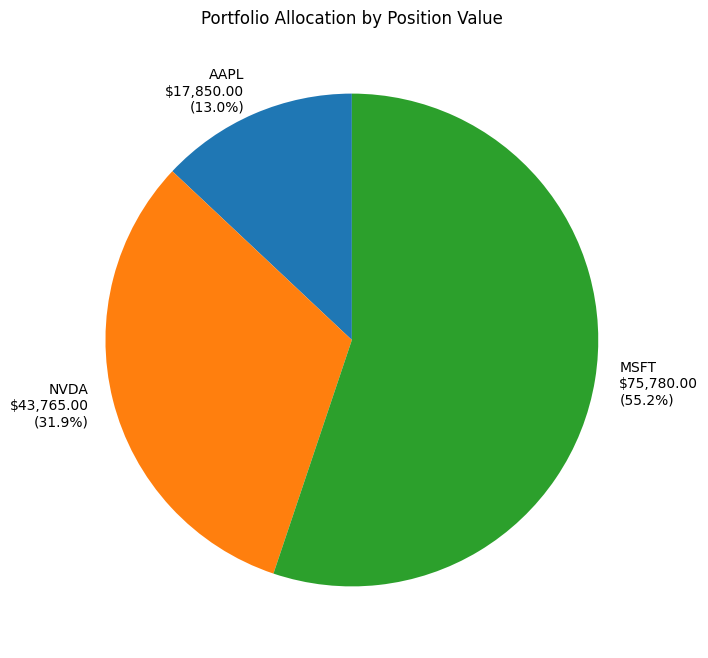

Final answer: Portfolio allocation pie chart created successfully.

[Step 1: Duration 10.34 seconds| Input tokens: 2,167 | Output tokens: 1,194]

In [24]:
# Allow matplotlib imports for visualization
portfolio_assistant_viz = CodeAgent(
    tools=[get_stock_price, get_historical_returns, get_company_sector],
    model=model,
    verbosity_level=LogLevel.INFO,
    max_steps=15,
    additional_authorized_imports=["numpy", "pandas", "matplotlib.pyplot"]
)

# Try this!
result = portfolio_assistant_viz.run("""
Create a pie chart showing my portfolio allocation:
- 100 shares of AAPL
- 50 shares of NVDA
- 200 shares of MSFT

Show the chart with position values and percentages.
""")

---

## Recap: Everything You've Learned

**Module 1 — Tool Calling:**  
Give LLMs access to real data with the `@tool` decorator

**Module 2 — ReAct:**  
Multi-step reasoning with Think → Act → Observe loops

**Module 3 — CodeAct:**  
Dynamic code generation for custom calculations

**Module 4 — Orchestration:**  
Combining patterns to solve complex problems

---

**You've gone from "ChatGPT makes up stock prices" to "I have a portfolio assistant."**

That's real progress.
